# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
pip install koreanize-matplotlib

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 49.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 17.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c10f0e98d58f39d9df7e9405f6294d94b59c72dbdadec08cf4700b0bf12099b8
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


### 1-2. 라이브러리 import

In [ ]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os
import koreanize_matplotlib

### 1-3. 한글 글꼴 설정(Windows)

In [ ]:
# if not os.path.exists("malgun.ttf"):
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [ ]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [ ]:
# !sudo apt-get install -y fonts-nanum

In [ ]:
# FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
# fm.fontManager.addfont(FONT_PATH)
# print(font_name)

# # plt.rcParams['font.family']=font_name
# plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

### 1-4. 구글드라이브 연결(Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [ ]:
data_path = '/content/drive/MyDrive/미니프로젝트/4차-1_1:1문의 게시판/train.csv'
data = pd.read_csv(data_path)

In [ ]:
data.shape

(3706, 2)

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [ ]:
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


In [ ]:
data.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
data.groupby(['label'], as_index=False)['text'].count()

,label,text
0,시스템 운영,561
1,원격,100
2,웹,732
3,이론,728
4,코드1,488
5,코드2,1097


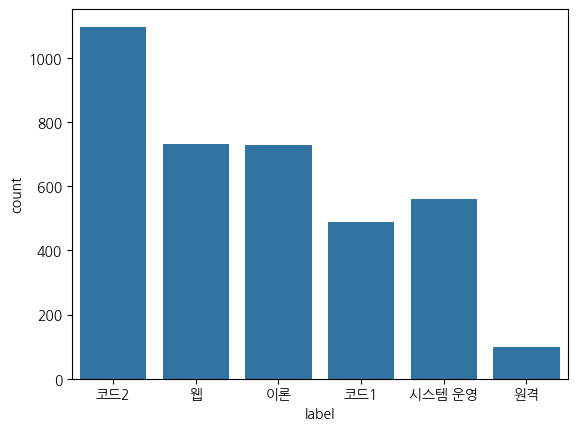

In [ ]:
sns.countplot(x = data['label'])
plt.show()

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [ ]:
data['text_len'] = data['text'].apply(lambda x: len(x)) # text 길이 컬럼 생성
data.head()

,text,label,text_len
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2,144
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹,119
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2,147
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2,279
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2,144


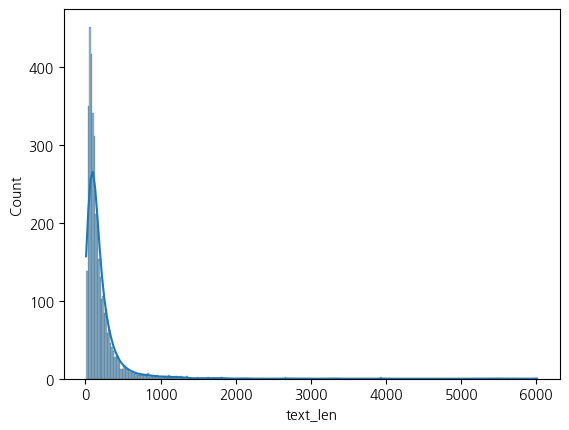

In [ ]:
sns.histplot(data['text_len'], kde=True)
plt.show()

In [ ]:
np.argmax(data['text_len']), np.argmin(data['text_len']) # text 길이가 가장 길고, 짧은 데이터 index

(2561, 756)

In [ ]:
data.loc[np.argmax(data['text_len'])] # 가장 긴 데이터

text        sns.kdeplot(x = td[var])\nplt.show()\n\n------...
label                                                     코드2
text_len                                                 6012
Name: 2561, dtype: object

In [ ]:
print(data.loc[np.argmax(data['text_len']), 'text']) # 가장 긴 데이터 내용 확인

sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs)
   1768             plot_kws["color"] = color
   1769 
-&gt; 1770         p.plot_univariate_density(
   1771             multip

In [ ]:
data.loc[np.argmin(data['text_len'])] # 가장 짧은 데이터

text        원격 부탁드립니다
label              원격
text_len            9
Name: 756, dtype: object

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [ ]:
%%time
from konlpy.tag import Okt
okt = Okt()
morphs = []
morphs_count = []
nouns = []
for i in data['text']:
    temp = okt.morphs(i)
    temp2 = okt.nouns(i)
    morphs.append(' '.join(temp))
    morphs_count.append(len(temp))
    nouns.append(' '.join(temp2))

CPU times: user 1min 9s, sys: 743 ms, total: 1min 10s
Wall time: 1min 1s


In [ ]:
temp # okt.morphs(i) 결과

['상관관계',
 '는',
 '그렇게',
 '크지',
 '않게',
 '나오는데',
 'p',
 '-',
 'value',
 '값',
 '은',
 '관련',
 '이',
 '있게',
 '나오는데',
 '이',
 '경우',
 '에는',
 '어떻게',
 '해석',
 '을',
 '해야하나요',
 '?']

In [ ]:
temp2 # okt.nouns(i) 결과

['상관관계', '값', '관련', '이', '경우', '해석']

In [ ]:
print(f'Number of Samples : {len(morphs_count)}')
print(f'Number of morphs per sample : {sum(morphs_count) / len(morphs_count):.2f}')

Number of Samples : 3706
Number of morphs per sample : 70.70


In [ ]:
m = MeCab()
m.pos(data['text'][np.argmin(data['text_len'])]) # 가장 짧은 데이터에서 MeCab 결과 확인해보기

[('원격', 'NNG'), ('부탁', 'NNG'), ('드립니다', 'VV+EC')]

In [ ]:
[x[0] for x in m.pos(data['text'][np.argmin(data['text_len'])])]

['원격', '부탁', '드립니다']

In [ ]:
%%time
morphs = []
morphs_count = []
pos = []
nouns = []
for i in data['text']:
    p = m.pos(i)
    pos.extend(p)
    temp = [x[0] for x in p]
    temp2 = m.nouns(i)
    morphs.append(' '.join(temp))
    morphs_count.append(len(temp))
    nouns.append(' '.join(temp2))

CPU times: user 7.73 s, sys: 66.5 ms, total: 7.8 s
Wall time: 8.26 s


In [ ]:
pos[:5]

[('self', 'SL'), ('.', 'SY'), ('convs', 'SL'), ('1', 'SN'), ('=', 'SY')]

In [ ]:
temp2

['상관', '관계', '값', '관련', '경우', '해석']

In [ ]:
print(f'Number of Samples : {len(morphs_count)}')
print(f'Number of morphs per sample : {sum(morphs_count) / len(morphs_count):.2f}')

Number of Samples : 3706
Number of morphs per sample : 80.27


In [ ]:
data['morphs'] = morphs
data['morphs_count'] = morphs_count
data['nouns'] = nouns
data.head()

,text,label,text_len,morphs,morphs_count,nouns
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2,144,self . convs 1 = nn . ModuleList ( [ nn . Conv...,66,여기 커널 사이즈 은 단어 최대 길이 가정 선언 것
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹,119,현재 이미지 를 여러 개 업로드 하 기 위해 자바 스크립트 로 동적 으로 폼 여러 ...,55,이미지 개 업로드 자바 스크립트 동적 폼 개 생성 데 클릭 뭘 수 기본 예제 코드 ...
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2,147,glob . glob ( PATH ) 를 사용 할 때 질문 입니다 . PATH 에 ...,70,사용 때 질문 포함 작동 것 질문 제공 파일 폴더 포함 폴더 안 정상 작동
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2,279,"tmpp = tmp . groupby ( by = ' Addr 1 ', as _ i...",100,오류 해결
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2,144,filename = TEST _ IMAGE + str ( round ( frame ...,55,안 폴더 안 이미지 저장 걸로 이해 실행 폴더 이미지 저장 질문


### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [ ]:
from collections import Counter

cnt = Counter(pos)
print('nmorphs :', len(cnt))
print(f'nmorphs / nchars : {len(cnt) / len(pos) :.2f}')

nmorphs : 11980
nmorphs / nchars : 0.04


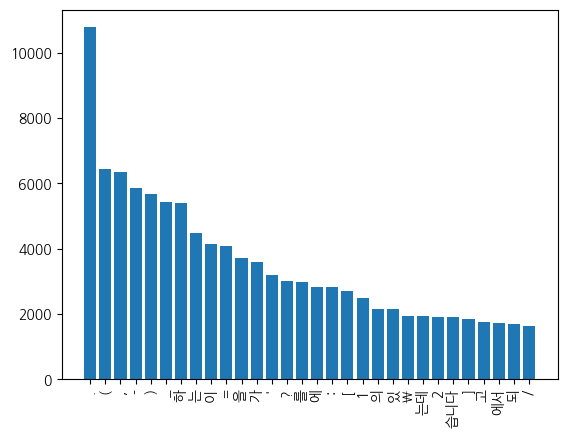

In [ ]:
# 형태소별 개수 상위 30개
temp = Counter([x[0] for x in pos]).most_common(30)
x, y = [], []
for i, j in temp:
    x.append(i)
    y.append(j)
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

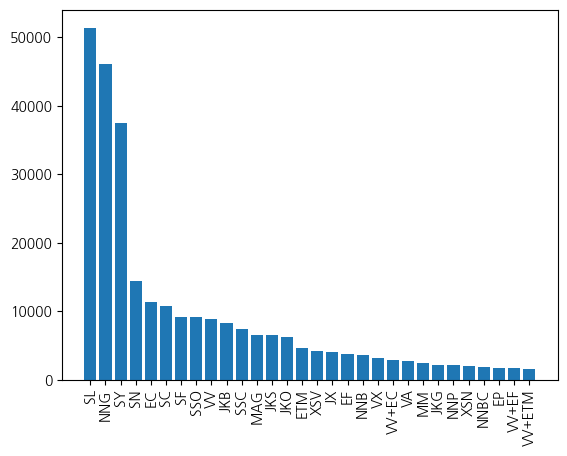

In [ ]:
# 품사별 개수 상위 30개
temp = Counter([x[1] for x in pos]).most_common(30)
x, y = [], []
for i, j in temp:
    x.append(i)
    y.append(j)
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

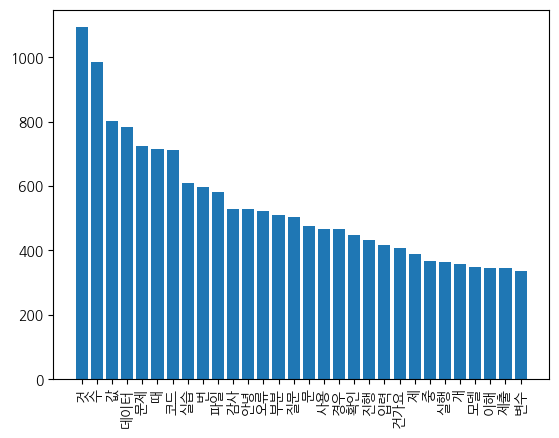

In [ ]:
# 명사별 개수 상위 30개
temp = Counter(' '.join(nouns).split()).most_common(30)
x, y = [], []
for i, j in temp:
    x.append(i)
    y.append(j)
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import nltk
temp = ' '.join([x for x in data['morphs']]).split()
temp = nltk.Text(temp)
print(len(temp.tokens))
print(len(set(temp.tokens)))
temp.vocab()

297493
11063


FreqDist({'.': 10783, '(': 6452, ',': 6362, '-': 5845, ')': 5668, '_': 5425, '하': 5410, '는': 4475, '이': 4155, '=': 4081, ...})

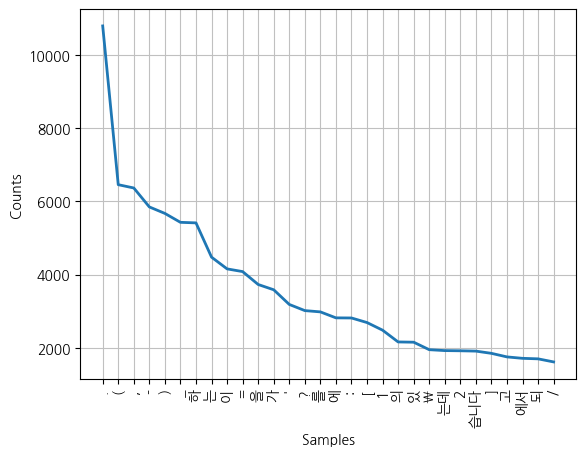

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
temp.plot(30)

In [ ]:
for i in data['label'].unique():
    print(i, 'similar :')
    temp.similar(i)
    print('-' * 50)

코드2 similar :
No matches
--------------------------------------------------
웹 similar :
면 어디 파이썬 기 안 코드 질문 어 해결 실행 고 문제 실습 라 경우 다음 조건 이후 변수 때문
--------------------------------------------------
이론 similar :
현재 코드 질문 와 실습 번 전처리 과정 혹시 ㅠㅠ 이번 수업 클라우드 어제 modelcheckpoint xgb 문득
--------------------------------------------------
코드1 similar :
No matches
--------------------------------------------------
시스템 운영 similar :
No matches
--------------------------------------------------
원격 similar :
피드백 axis 설명 방법 무엇 도움 자동 시간 과 값 변량 확인 그런데 과정 답 ㅠㅠ 그림 print 식 label
--------------------------------------------------


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
temp.collocations()

데이터 프레임; recent call; call last; File "",; "", line; import sys;
python manage; 드려도 될까요; -*- coding; init __.; \__ init; 라우팅 테이블; 테스트
케이스; pip install; 데이터 전처리; 하이퍼 파라미터; -*- import; return self; ']].
sum; module named


In [ ]:
temp.collocation_list()

[('데이터', '프레임'),
 ('recent', 'call'),
 ('call', 'last'),
 ('File', '"",'),
 ('"",', 'line'),
 ('import', 'sys'),
 ('python', 'manage'),
 ('드려도', '될까요'),
 ('-*-', 'coding'),
 ('init', '__.'),
 ('\\__', 'init'),
 ('라우팅', '테이블'),
 ('테스트', '케이스'),
 ('pip', 'install'),
 ('데이터', '전처리'),
 ('하이퍼', '파라미터'),
 ('-*-', 'import'),
 ('return', 'self'),
 ("']].", 'sum'),
 ('module', 'named')]

In [ ]:
import konlpy

In [ ]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.0 MB/s eta 0:00:00


(S (NP 원격/NNG 부탁/NNG) (VP 드립니다/VV+EC))
None
원격 부탁
(NP 원격/NNG 부탁/NNG)
None


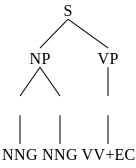

In [ ]:
# 최소길이 문의에 대해 grammar parsing

grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"

sentence = data.loc[np.argmin(data['text_len']), 'text'] # 가장 짧은 데이터
m = MeCab()
words = m.pos(sentence)

parser = nltk.RegexpParser(grammar)
chunks = parser.parse(words)
print(chunks.pprint())

for subtree in chunks.subtrees():
    if subtree.label() == 'NP':
        print(' '.join((e[0] for e in list(subtree))))
        print(subtree.pprint())

display(chunks)

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

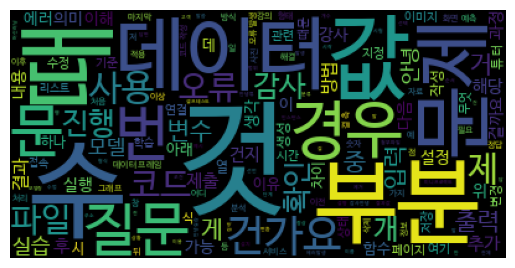

In [ ]:
from wordcloud import WordCloud
temp = ' '.join(nouns)
wordcloud = WordCloud(font_path='NanumBarunGothic', max_font_size=100).generate(temp)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

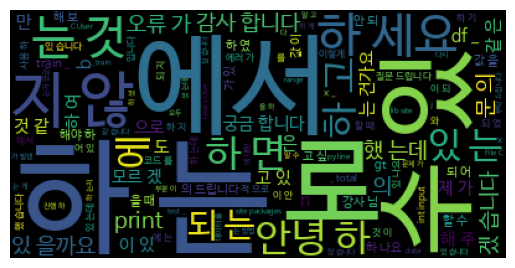

In [ ]:
temp = ' '.join(data['morphs'])
wordcloud = WordCloud(font_path='NanumBarunGothic', max_font_size=100).generate(temp)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    if label:
        df = df.loc[df['label'] == label]

    print('결측치 확인')
    print(df.isna().sum())
    print()
    plt.figure()
    plt.title('label 별 데이터 개수')
    sns.countplot(x = df['label'])
    plt.show()

    df['text_len'] = df['text'].apply(lambda x: len(x)) # text 길이 컬럼 생성
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.title('text 길이')
    sns.histplot(df['text_len'], kde=True)

    m = MeCab()
    nouns = []
    for i in df['text']:
        temp = m.nouns(i)
        nouns.append(' '.join(temp))

    # 명사별 개수 상위 30개
    temp = Counter(' '.join(nouns).split()).most_common(30)
    x, y = [], []
    for i, j in temp:
        x.append(i)
        y.append(j)
    plt.subplot(2, 1, 2)
    plt.title('명사 별 개수 상위 30개')
    plt.bar(x, y)
    plt.xticks(rotation=90)
    plt.show()

    temp = ' '.join(nouns)
    wordcloud = WordCloud(font_path='NanumBarunGothic', max_font_size=100).generate(temp)
    plt.figure()
    plt.title('Word Cloud')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### 4-2. 각각의 문의 유형에 대해 실행합니다.

결측치 확인
text            0
label           0
text_len        0
morphs          0
morphs_count    0
nouns           0
dtype: int64
12      시스템 운영
33      시스템 운영
36      시스템 운영
38      시스템 운영
49      시스템 운영
         ...  
3675    시스템 운영
3685    시스템 운영
3697    시스템 운영
3699    시스템 운영
3702    시스템 운영
Name: label, Length: 561, dtype: object


<ipython-input-72-bb9f9f459946>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = df['text'].apply(lambda x: len(x)) # text 길이 컬럼 생성


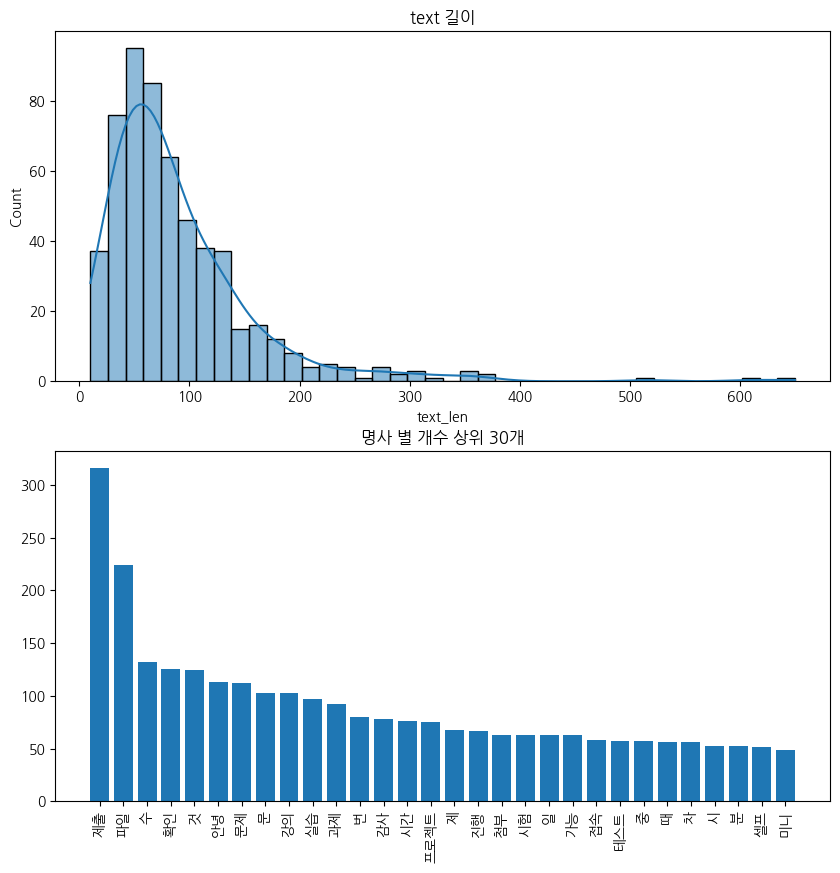

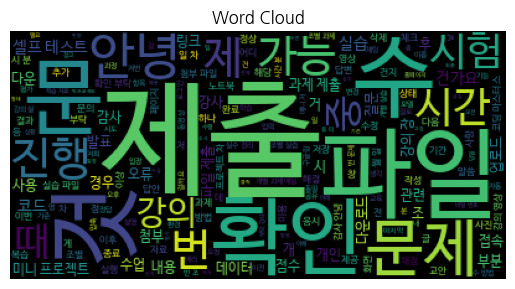

결측치 확인
text            0
label           0
text_len        0
morphs          0
morphs_count    0
nouns           0
dtype: int64
37      원격
60      원격
69      원격
101     원격
271     원격
        ..
3550    원격
3595    원격
3648    원격
3651    원격
3704    원격
Name: label, Length: 100, dtype: object


<ipython-input-72-bb9f9f459946>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = df['text'].apply(lambda x: len(x)) # text 길이 컬럼 생성


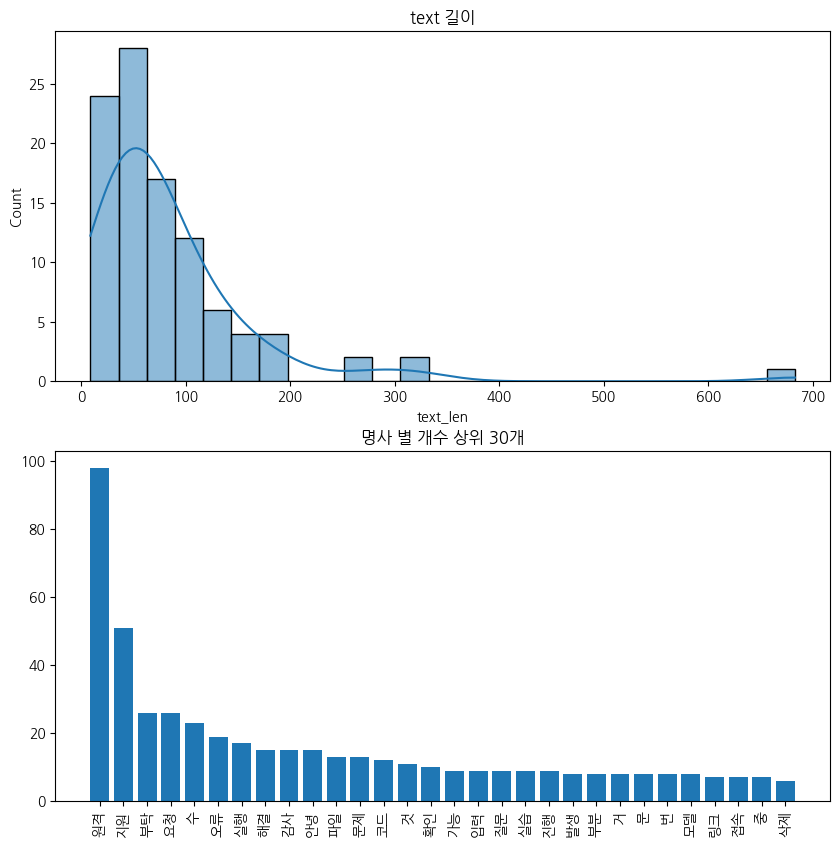

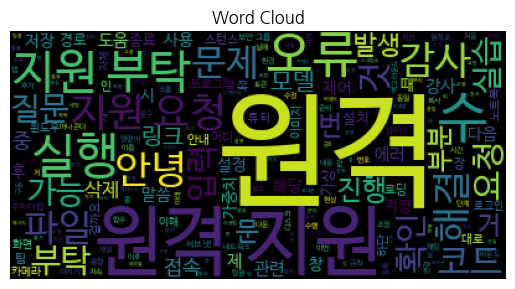

결측치 확인
text            0
label           0
text_len        0
morphs          0
morphs_count    0
nouns           0
dtype: int64
1       웹
6       웹
9       웹
11      웹
19      웹
       ..
3689    웹
3691    웹
3692    웹
3698    웹
3700    웹
Name: label, Length: 732, dtype: object


<ipython-input-72-bb9f9f459946>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = df['text'].apply(lambda x: len(x)) # text 길이 컬럼 생성


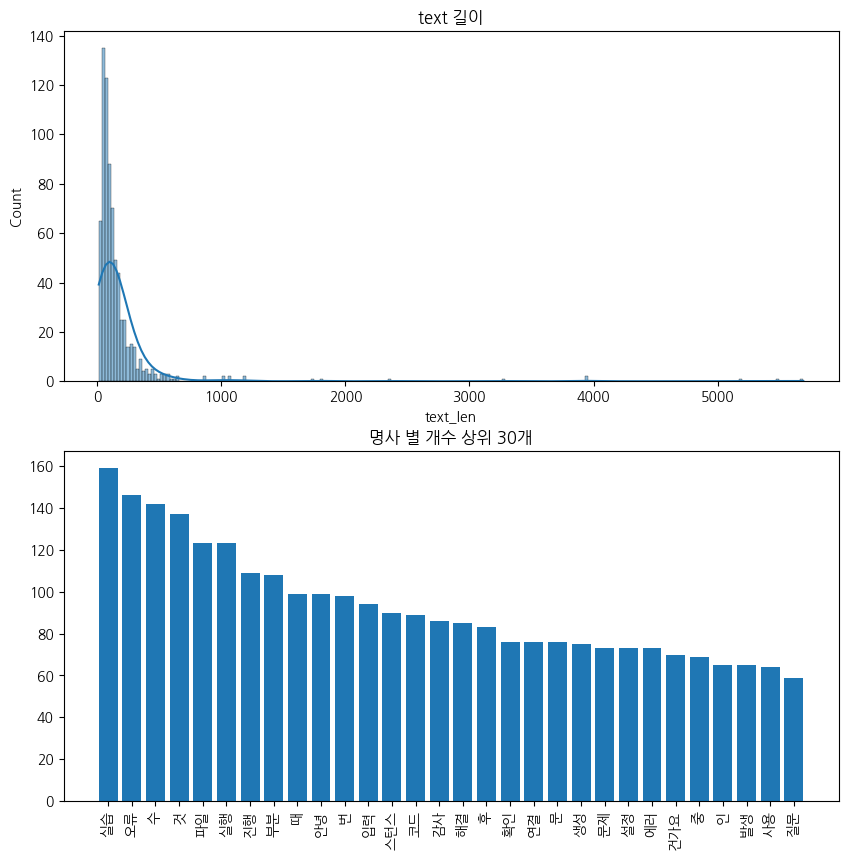

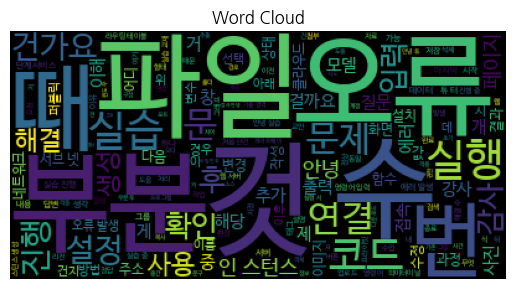

결측치 확인
text            0
label           0
text_len        0
morphs          0
morphs_count    0
nouns           0
dtype: int64
5       이론
7       이론
20      이론
22      이론
26      이론
        ..
3688    이론
3690    이론
3694    이론
3703    이론
3705    이론
Name: label, Length: 728, dtype: object


<ipython-input-72-bb9f9f459946>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = df['text'].apply(lambda x: len(x)) # text 길이 컬럼 생성


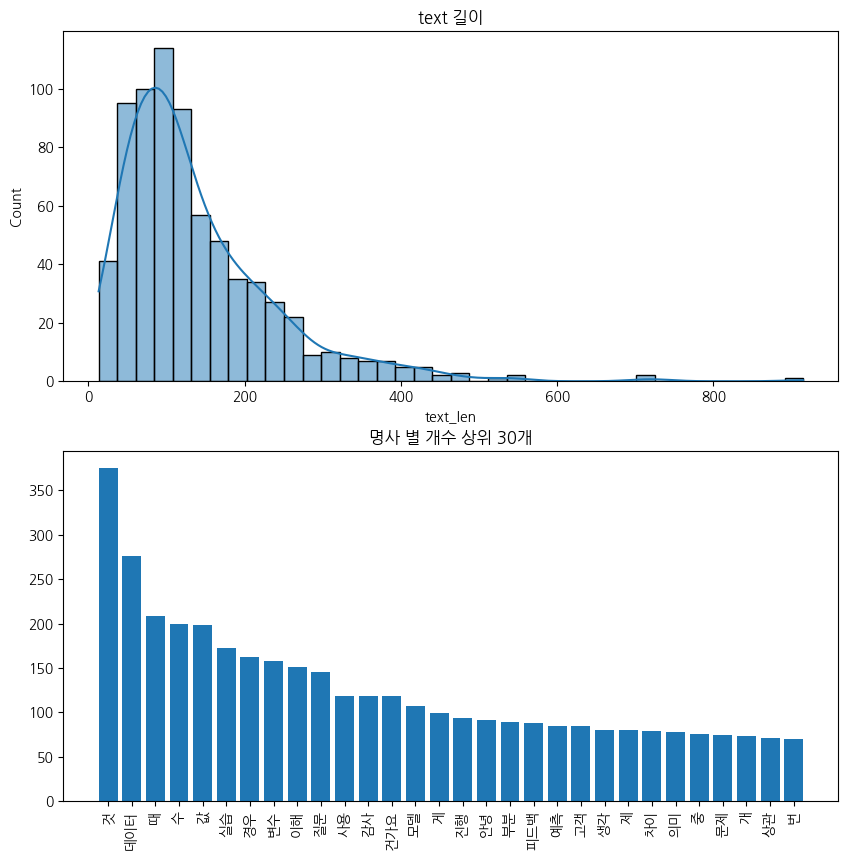

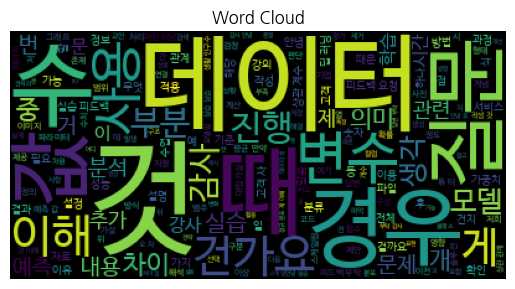

결측치 확인
text            0
label           0
text_len        0
morphs          0
morphs_count    0
nouns           0
dtype: int64
8       코드1
14      코드1
16      코드1
27      코드1
58      코드1
       ... 
3669    코드1
3670    코드1
3672    코드1
3676    코드1
3695    코드1
Name: label, Length: 488, dtype: object


<ipython-input-72-bb9f9f459946>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = df['text'].apply(lambda x: len(x)) # text 길이 컬럼 생성


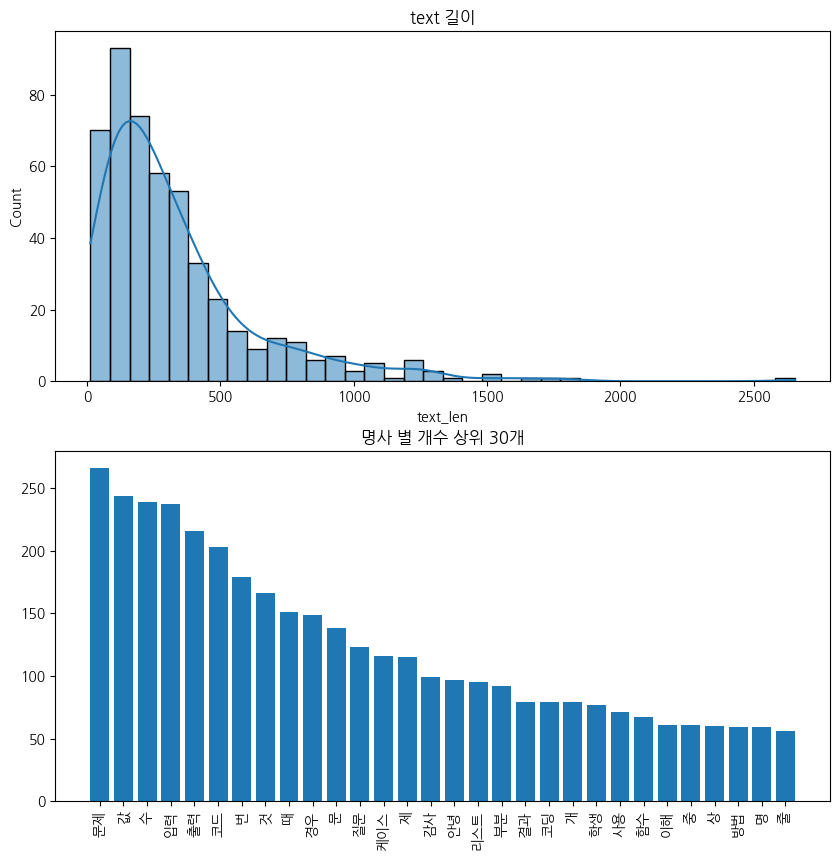

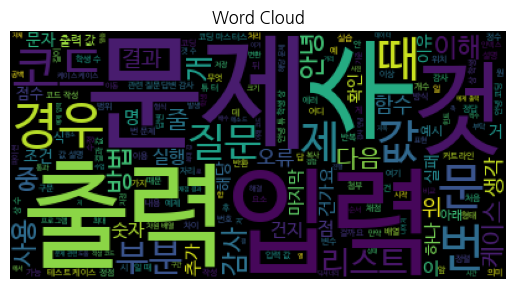

결측치 확인
text            0
label           0
text_len        0
morphs          0
morphs_count    0
nouns           0
dtype: int64
0       코드2
2       코드2
3       코드2
4       코드2
10      코드2
       ... 
3683    코드2
3686    코드2
3693    코드2
3696    코드2
3701    코드2
Name: label, Length: 1097, dtype: object


<ipython-input-72-bb9f9f459946>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = df['text'].apply(lambda x: len(x)) # text 길이 컬럼 생성


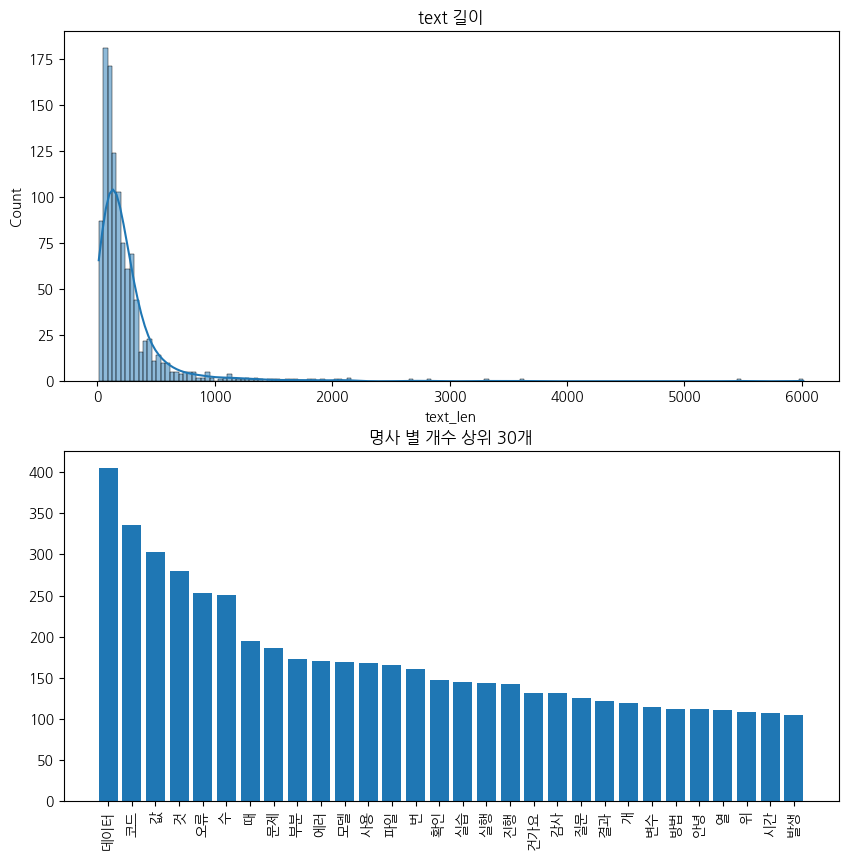

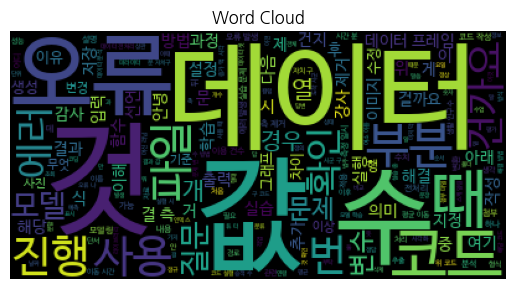

In [ ]:
for label in sorted(data.label.unique()):
    text_analysis(data,label)

결측치 확인
text            0
label           0
text_len        0
morphs          0
morphs_count    0
nouns           0
dtype: int64
0          코드2
1            웹
2          코드2
3          코드2
4          코드2
         ...  
3701       코드2
3702    시스템 운영
3703        이론
3704        원격
3705        이론
Name: label, Length: 3706, dtype: object


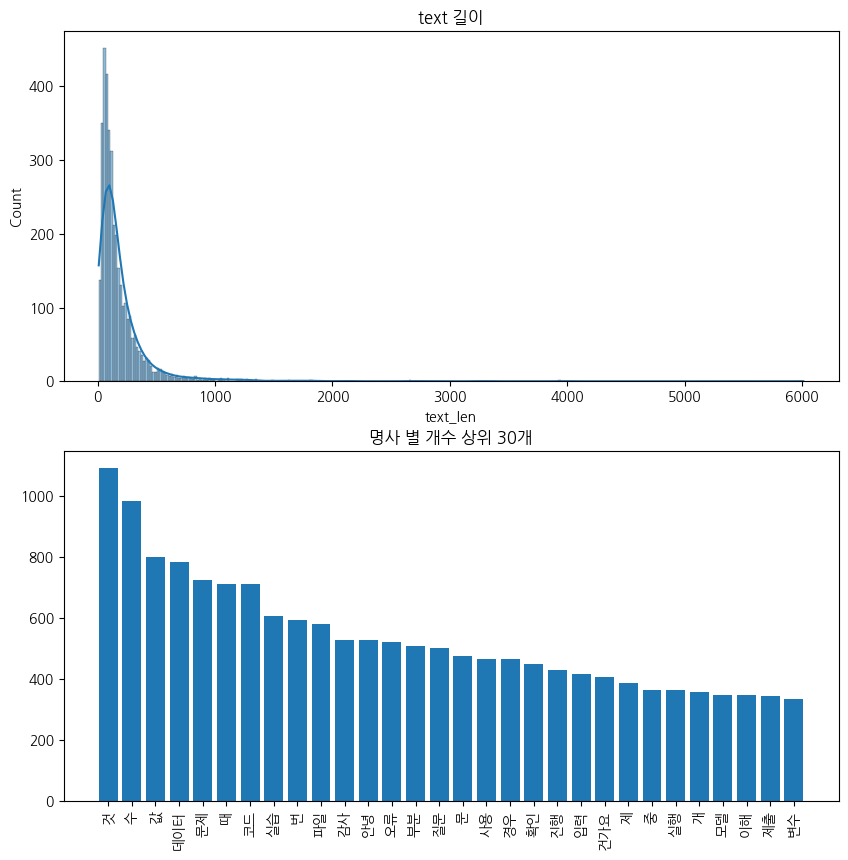

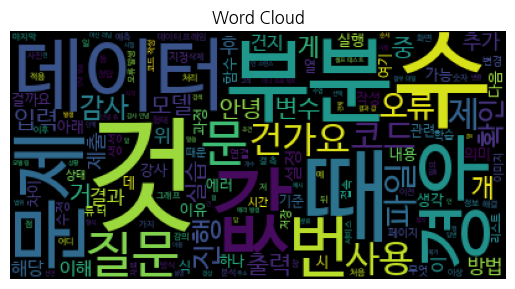

In [ ]:
text_analysis(data)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [ ]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

df = data.replace(label_dict)
df.head()

,text,label,text_len,morphs,morphs_count,nouns
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0,144,self . convs 1 = nn . ModuleList ( [ nn . Conv...,66,여기 커널 사이즈 은 단어 최대 길이 가정 선언 것
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1,119,현재 이미지 를 여러 개 업로드 하 기 위해 자바 스크립트 로 동적 으로 폼 여러 ...,55,이미지 개 업로드 자바 스크립트 동적 폼 개 생성 데 클릭 뭘 수 기본 예제 코드 ...
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0,147,glob . glob ( PATH ) 를 사용 할 때 질문 입니다 . PATH 에 ...,70,사용 때 질문 포함 작동 것 질문 제공 파일 폴더 포함 폴더 안 정상 작동
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0,279,"tmpp = tmp . groupby ( by = ' Addr 1 ', as _ i...",100,오류 해결
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0,144,filename = TEST _ IMAGE + str ( round ( frame ...,55,안 폴더 안 이미지 저장 걸로 이해 실행 폴더 이미지 저장 질문


### 5-2. Train Validation split

In [ ]:
from sklearn.model_selection import train_test_split
x = df['morphs']
y = df['label']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2023, stratify=y)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2964,), (742,), (2964,), (742,))

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [ ]:
import re

str = "AA**BB#@$CC 가나다-123"

new_str = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str)
print(new_str)

AABBCC 가나다123


In [ ]:
x

0       self . convs 1 = nn . ModuleList ( [ nn . Conv...
1       현재 이미지 를 여러 개 업로드 하 기 위해 자바 스크립트 로 동적 으로 폼 여러 ...
2       glob . glob ( PATH ) 를 사용 할 때 질문 입니다 . PATH 에 ...
3       tmpp = tmp . groupby ( by = ' Addr 1 ', as _ i...
4       filename = TEST _ IMAGE + str ( round ( frame ...
                              ...                        
3701    토큰 화 이후 train val 를 분리 하 고 각 train set , val s...
3702    올린 값 들 중 최고점 인 건가요 ? 아니면 최근 에 올린 파일 로 무조건 갱신 인...
3703    수업 에서 cacoo 랑 packet tracer 를 배우 는 이유 가 1 . IT...
3704    inplace = True 해도 값 이 변경 이 안 되 고 none 으로 뜹니다 ....
3705    상관 관계 는 그렇게 크 지 않 게 나오 는데 p - value 값 은 관련 이 있...
Name: morphs, Length: 3706, dtype: object

In [ ]:
x.apply(lambda x: re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", x))

0       self  convs 1  nn  ModuleList   nn  Conv 2 d  ...
1       현재 이미지 를 여러 개 업로드 하 기 위해 자바 스크립트 로 동적 으로 폼 여러 ...
2       glob  glob  PATH  를 사용 할 때 질문 입니다  PATH 에   가 ...
3       tmpp  tmp  groupby  by   Addr 1  as  index  Fa...
4       filename  TEST  IMAGE  str  round  frame  sec ...
                              ...                        
3701    토큰 화 이후 train val 를 분리 하 고 각 train set  val se...
3702    올린 값 들 중 최고점 인 건가요  아니면 최근 에 올린 파일 로 무조건 갱신 인가...
3703    수업 에서 cacoo 랑 packet tracer 를 배우 는 이유 가 1  IT ...
3704    inplace  True 해도 값 이 변경 이 안 되 고 none 으로 뜹니다  혹...
3705    상관 관계 는 그렇게 크 지 않 게 나오 는데 p  value 값 은 관련 이 있 ...
Name: morphs, Length: 3706, dtype: object

In [ ]:
x_train = x_train.apply(lambda x: re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", x))
x_val = x_val.apply(lambda x: re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", x))

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [ ]:
x_train

3002    안녕 하 세요 질문 드립니다  stu 01    no  1   name   홍길동 ...
2724     5  검증  예측 pl  ml  predict  x  val  pl pl  rea...
80      지금 현재 문자열 에서 float 으로 변환 하 는 것 은 불 가능 으로 보입니다 ...
2607    kubeadm join 제 꺼 복 붙 하고 입력 했 는데 저렇게 중간 에 잘리 고 ...
1723    수치 화 과정 에서 Age 열 에 결 측 치가 있 어 결 측 치 를 제거 했 더니 ...
                              ...                        
2553    test dataset 을 detect 를 할 때  모델 이 예측 한 각 objec...
2694    RTB 에 대해 생각 하 다가 의문 이 하나 들 었 습니다  1  보통 키오스 크 ...
2415    항상 자세 한 설명 감사 드립니다  금방 강의 중 with open  f  path...
3254    Yes  data  loc  data   US  Yes   Sales  No  da...
182     elements  dom  select   gBestWrap  gt  div  gt...
Name: morphs, Length: 2964, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)
vect.vocabulary_

{'안녕': 6312,
 '세요': 5988,
 '질문': 7423,
 '드립니다': 4972,
 'stu': 3453,
 '01': 21,
 'no': 2674,
 'name': 2623,
 '홍길동': 8122,
 'score': 3221,
 '92': 864,
 '96': 885,
 '98': 889,
 'mean': 2493,
 '95': 878,
 '3333333': 460,
 'print': 2950,
 '학생': 7965,
 '평균': 7855,
 '점수': 7152,
 '입니다': 7002,
 '같이': 4045,
 '딕셔너리': 5017,
 '만들': 5201,
 '대하': 4822,
 '소수점': 6020,
 '둘째': 4947,
 '자리': 7019,
 '까지': 4455,
 '출력': 7569,
 '려고': 5106,
 '는데': 4681,
 'string': 3447,
 '이용': 6910,
 '해서': 8039,
 '걸까요': 4090,
 '신택스': 6208,
 '에러': 6438,
 '뜹니다': 5060,
 '감사': 4016,
 '합니다': 8010,
 '검증': 4103,
 '예측': 6558,
 'pl': 2895,
 'ml': 2543,
 'predict': 2936,
 'val': 3733,
 'real': 3050,
 'train': 3614,
 'max': 2478,
 'min': 2526,
 '단계': 4731,
 '에서': 6439,
 '실제': 6223,
 '라고': 5067,
 '이해': 6928,
 '갑니다': 4020,
 '곡선': 4186,
 '자체': 7039,
 '강사': 4029,
 '이랑': 6874,
 '다르': 4708,
 '나온': 4517,
 '은데': 6809,
 '뭔가': 5389,
 '잘못': 7055,
 '지금': 7350,
 '현재': 8096,
 '문자열': 5371,
 'float': 1867,
 '으로': 6786,
 '변환': 5571,
 '가능': 3950,
 '보입니다': 

In [ ]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(x_train)
vect.vocabulary_

{'안녕 세요': 39539,
 '세요 질문': 36571,
 '질문 드립니다': 49604,
 '드립니다 stu': 28771,
 'stu 01': 16807,
 '01 no': 81,
 'no name': 12507,
 'name 홍길동': 12332,
 '홍길동 score': 55406,
 'score 92': 15489,
 '92 96': 2868,
 '96 98': 2924,
 '98 mean': 2939,
 'mean 95': 11634,
 '95 3333333': 2900,
 '3333333 print': 1815,
 'print 학생': 14257,
 '학생 평균': 53461,
 '평균 점수': 52745,
 '점수 stu': 47420,
 '01 mean': 80,
 'mean 입니다': 11661,
 '입니다 같이': 46137,
 '같이 딕셔너리': 20264,
 '딕셔너리 만들': 29152,
 '만들 mean': 30636,
 'mean 대하': 11653,
 '대하 소수점': 27453,
 '소수점 둘째': 36706,
 '둘째 자리': 28624,
 '자리 까지': 46539,
 '까지 출력': 23880,
 '출력 려고': 50741,
 '려고 는데': 30089,
 '는데 print': 25446,
 'print 같이': 14182,
 '같이 string': 20231,
 'string 이용': 16790,
 '이용 해서': 45176,
 '해서 출력': 54667,
 '출력 걸까요': 50702,
 '걸까요 신택스': 20813,
 '신택스 에러': 38370,
 '에러 뜹니다': 40584,
 '뜹니다 감사': 29561,
 '감사 합니다': 19972,
 '검증 예측': 20959,
 '예측 pl': 42162,
 'pl ml': 13677,
 'ml predict': 11887,
 'predict val': 13993,
 'val pl': 18467,
 'pl pl': 13678,
 'pl real': 13679,
 'r

In [ ]:
np.where(vect.transform(x_train).toarray()[0]==0, 1, 0).sum() / len(vect.transform(x_train).toarray()[0])

0.9991761735050235

In [ ]:
len(vect.vocabulary_)

55837

In [ ]:
vect.transform(x_train).shape

(2964, 55837)

In [ ]:
bi_gram_train = vect.transform(x_train)
bi_gram_val = vect.transform(x_val)

In [ ]:
bi_gram_train.shape

(2964, 55837)

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

In [ ]:
x_train

3002    안녕 하 세요 질문 드립니다  stu 01    no  1   name   홍길동 ...
2724     5  검증  예측 pl  ml  predict  x  val  pl pl  rea...
80      지금 현재 문자열 에서 float 으로 변환 하 는 것 은 불 가능 으로 보입니다 ...
2607    kubeadm join 제 꺼 복 붙 하고 입력 했 는데 저렇게 중간 에 잘리 고 ...
1723    수치 화 과정 에서 Age 열 에 결 측 치가 있 어 결 측 치 를 제거 했 더니 ...
                              ...                        
2553    test dataset 을 detect 를 할 때  모델 이 예측 한 각 objec...
2694    RTB 에 대해 생각 하 다가 의문 이 하나 들 었 습니다  1  보통 키오스 크 ...
2415    항상 자세 한 설명 감사 드립니다  금방 강의 중 with open  f  path...
3254    Yes  data  loc  data   US  Yes   Sales  No  da...
182     elements  dom  select   gBestWrap  gt  div  gt...
Name: morphs, Length: 2964, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer(lower=False)
tk.fit_on_texts(x_train)
train_seq = tk.texts_to_sequences(x_train)
val_seq = tk.texts_to_sequences(x_val)

In [ ]:
len(tk.word_index) # token 개수

9426

In [ ]:
count = 0
for k, v in tk.word_counts.items():
    if v < 2:
        count += 1
count

3510

In [ ]:
max_words = len(tk.word_index) - count + 1

tk = Tokenizer(num_words=max_words, lower=False)
tk.fit_on_texts(x_train)
train_seq = tk.texts_to_sequences(x_train)
val_seq = tk.texts_to_sequences(x_val)

<Axes: ylabel='Count'>

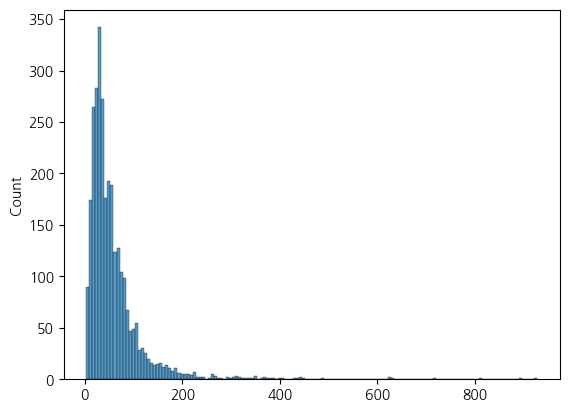

In [ ]:
sns.histplot([len(x) for x in train_seq]) # tokenize 된 결과의 길이 분포도

In [ ]:
max([len(x) for x in train_seq]), min([len(x) for x in train_seq])

(927, 3)

In [ ]:
temp = np.array([len(x) for x in train_seq])
max_idx = np.where(temp == 927)[0][0]
min_idx = np.where(temp == 3)[0][0]

In [ ]:
tk.sequences_to_texts([train_seq[min_idx]])

['지원 부탁 드립니다']

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 400
train_seq = pad_sequences(train_seq, maxlen=max_len, padding='pre', truncating='post') # padding은 앞, truncating은 뒤
val_seq = pad_sequences(val_seq, maxlen=max_len, padding='pre', truncating='post') # padding은 앞, truncating은 뒤

### 6-4. Word2Vec (gensim, optional)
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다.
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다.
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])

    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다.
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)

    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다.
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다.
    sent_embedding_vectors = np.stack(dataset)

    return sent_embedding_vectors

In [ ]:
from tqdm import tqdm
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(x_train):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 2964/2964 [00:24<00:00, 121.54it/s]


최대 길이 : 929
평균 길이 : 55.32557354925776
최소 길이 : 3


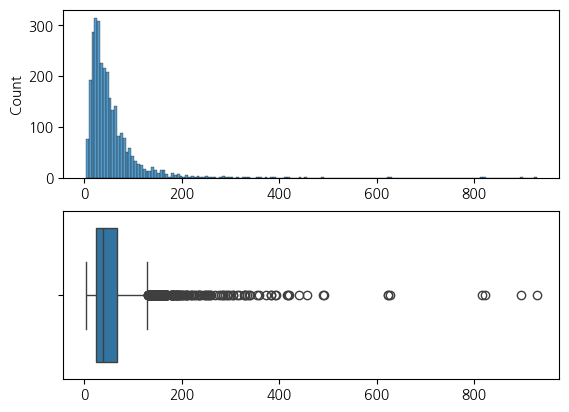

In [ ]:
temp = np.array([len(x) for x in tokenized_data])
print('최대 길이 :', temp.max())
print('평균 길이 :', temp.mean())
print('최소 길이 :', temp.min())

plt.subplot(2, 1, 1)
sns.histplot(temp)
plt.subplot(2, 1, 2)
sns.boxplot(x=temp)
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_data)

In [ ]:
model.wv.vectors.shape

(2993, 100)

In [ ]:
model.wv.most_similar('코드')

[('아래', 0.964742124080658),
 ('다음', 0.9588164687156677),
 ('작성', 0.9513171315193176),
 ('사진', 0.9482975602149963),
 ('같이', 0.9398014545440674),
 ('이다', 0.9212914705276489),
 ('계속', 0.9168753027915955),
 ('처럼', 0.9138734340667725),
 ('면서', 0.8948323726654053),
 ('첨부', 0.8935210704803467)]

In [ ]:
w2v_x_train = get_dataset(x_train, model, 100)
w2v_x_val = get_dataset(x_val, model, 100)

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [ ]:
import scipy
save_path = '/content/drive/MyDrive/미니프로젝트/4차-1_1:1문의 게시판/1:1문의 게시판 데이터/'
scipy.sparse.save_npz(save_path + 'bigram_x_train.npz', bi_gram_train)
scipy.sparse.save_npz(save_path + 'bigram_x_val.npz', bi_gram_val)

In [ ]:
y_train.to_csv(save_path + 'y_train.csv', index=False)
y_val.to_csv(save_path + 'y_val.csv', index=False)

In [ ]:
np.save(save_path + 'seq_x_train', train_seq)
np.save(save_path + 'seq_x_val', val_seq)

In [ ]:
np.save(save_path + 'w2v_x_train', w2v_x_train)
np.save(save_path + 'w2v_x_val', w2v_x_val)